# Homework exercise 4
## Deadline: upload to Moodle by 22 June 18:00 h

__Please submit your homework either as a Jupyter Notebook or using .py files.__

If you use .py files, please also include a PDF containing the output of your code and your explanations. Either way, the code needs to be in a form that can be easily run on another computer.

__Name 1: Tobias Held

__Name 2: Marco Almbauer

__Name 3: Luca Di Lenola 


The name of the file that you upload should be named *Homework1_YourLastName_YourStudentID*.

Reminder: you are required to attend class on 23 June to earn points for this homework exercise unless you have a valid reason for your absence.

You are encouraged to work on this exercise in teams of up to three students. If any part of the questions is unclear, please ask on the Moodle forum.

#### Classification, Sentiment Analysis


__1. Classification__

Attached you will find a file `company_data.csv` that contains data for a list of US-listed stocks for the year 2019. Each row contains data for one company, and the columns contain the following features: total assets, number of shares outstanding, long-term debt, EBIT, EBITDA, net income, stock price at the end of the year, highest price of the year, lowest price of the year, and the exchange code indicating on which exchange a stock is listed, where the value 11 refers to the New York Stock Exchange and the value 14 to Nasdaq. Before proceeding with the classification task, remove all rows where
(i) any column has a missing value, 
(ii) the exchange code is different from 11 or 14,
(iii) any duplicates.

Please use the data to predict the exchange listing using

* a Perceptron
* a DecisionTreeClassifier

You may increase the number of features by combining columns contained in the data set (e.g., earnings per share, to give just one example) before applying the learning algorithms.

Split the data into training and test data and apply the learning algorithms for various choices of the hyperparameters. (You are not expected to systematically find the best hyperparmeters, but please include all choices that you tried in your homework submission and not just the one delivering the best results.) For each choice of hyperparameters, report the percentage of correctly classified stocks for the training data and for the test data.

In [128]:
import pandas as pd
import numpy as np
from itertools import combinations
import random

from sklearn.linear_model import Perceptron
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

# reads the file
df = pd.read_csv(r'C:\Users\Tobias Held\SynologyDrive\Downloads\company_data.csv')

# drops duplactes and non 11,14 exchange codes
df.drop(df[(df. exchg != 11) & (df.exchg != 14)].index, inplace=True)
df.dropna(inplace=True)
df.drop_duplicates(inplace=True)

# renaming columns
df.columns=['total assets','number of shares outs','lt-debt','EBIT','EBITDA','net income','price EOY','Year high','Year low','exchg']


# creating new columns by conducting all possible divison using the first 9 columns and concats them into one df

L = {f'{a}/{b}': df[a].div(df[b]) for a, b in combinations(df.columns[0:8], 2)}

df2 = pd.concat(L, axis=1)
df = pd.concat([df,df2], axis=1)


# numeric list of columns to later select X combinations
variables = list(range(len(df.columns)))
variables.remove(9)

# mapping of column names into a dictionary
column_names = list(df.columns)
column_names.remove("exchg")
mapping = dict(zip(variables,column_names))



# list of all possible combinations of variables
variables_combinations = (list(elem) for elem in (list(combinations(variables,2))))


# changes infinte values to 0 (which popped up due to some stocks havin 0 long term debt)
df.replace(to_replace=np.inf, value = 0, inplace = True)


# hyperparamters (should have been also used in loop, but python was throwing errors)

# iterations = []
# learning_rates = []
# test_sizes = []

# for i in range(len(list(variables_combinations))):
#     iterations.append(random.choice(range(100, 10000)))
#     learning_rates.append(random.choice(range(1, 1000))/1000)
#     test_sizes.append(random.choice(range(1, 10))/10)


    
# definition of y
y = df.iloc[:,9]

#empty lists for results
test_accuracy = []
train_accuracy = []

iterations_x = []
learning_rates_x = []
test_sizes_x = []

Misclassified_samples = []
Misclassified_train_samples = []


tree_test_accuracy = []
tree_train_accuracy = []

Misclassified_samples_tree = []
Misclassified_train_samples_tree = []

combination_s = []

In [130]:
# writing the classification as an function for later re-use
def classification_run(combinations):
     
    for combination in combinations:
        
        X = df.iloc[:,combination]


        # split in test and training data 
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=1, stratify=y)

        sc = StandardScaler()
        sc.fit(X_train)
        X_train_std = sc.transform(X_train)
        X_test_std = sc.transform(X_test)

        # Fit training Data
        ppn = Perceptron(max_iter=1000, eta0=1, random_state=1)
        ppn.fit(X_train_std, y_train)

        # predict
        y_pred = ppn.predict(X_test_std)
        y_pred_train = ppn.predict(X_train_std)
        
    
        # accuracy 
        test_accuracy.append(round(accuracy_score(y_test, y_pred),3))
        train_accuracy.append(round(accuracy_score(y_train, y_pred_train),3))
        
        
        Misclassified_samples.append((y_test != y_pred).sum())
        Misclassified_train_samples.append((y_train != y_pred_train).sum())
        
        
        #### decision tree start 
        tree_clf = DecisionTreeClassifier(max_depth=2, random_state=1)
        tree_clf.fit(X_train_std, y_train)
        
        y_pred_test_tree = tree_clf.predict(X_test_std)
        y_pred_train_tree = tree_clf.predict(X_train_std)
        
            
        tree_test_accuracy.append(round(accuracy_score(y_test, y_pred_test_tree),3))
        tree_train_accuracy.append(round(accuracy_score(y_train, y_pred_train_tree),3))
        
        Misclassified_samples_tree.append((y_test != y_pred_test_tree).sum())
        Misclassified_train_samples_tree.append((y_train != y_pred_train_tree).sum())

        combination_s.append(combination)
     
     # return of various variables for plotting
    return X, ppn, tree_clf, X_train_std, X_test_std, y_train, y_test

In [132]:
# execute function

classification_run(variables_combinations)



# writes the combinations into a list for identifying the paramter combinations
variables_combinations_names = []
for li in combination_s:
      variables_combinations_names.append(list(map(mapping.get, li))) 

# result data frames
results_perceptron = pd.DataFrame(list(zip(combination_s,variables_combinations_names,test_accuracy, train_accuracy,Misclassified_samples,Misclassified_train_samples)), columns =['combination_s','variables_combinations_names', 'test_accuracy', 'train_accuracy', 'Misclassified_samples','Misclassified_train_samples'])
results_tree = pd.DataFrame(list(zip(combination_s,variables_combinations_names, tree_test_accuracy, tree_train_accuracy, Misclassified_samples_tree, Misclassified_train_samples_tree)), columns=['combination_s','variables_combinations_names', 'test_accuracy_tree', 'train_accuracy_tree', 'Misclassified_samples_tree', 'Misclassified_train_samples_tree'])
  
results_perceptron.sort_values(by=['test_accuracy'], ascending=False, inplace=True)
results_tree.sort_values(by=['test_accuracy_tree'], ascending=False, inplace=True)


print(results_perceptron)
print(results_tree)

    combination_s                       variables_combinations_names  \
77        [2, 10]      [lt-debt, total assets/number of shares outs]   
84        [2, 17]           [lt-debt, number of shares outs/lt-debt]   
542      [21, 34]  [number of shares outs/price EOY, EBITDA/Year ...   
31        [0, 33]                   [total assets, EBITDA/price EOY]   
337      [11, 34]           [total assets/lt-debt, EBITDA/Year high]   
..            ...                                                ...   
582      [24, 32]                [lt-debt/EBITDA, EBITDA/net income]   
562      [23, 25]                 [lt-debt/EBIT, lt-debt/net income]   
624      [28, 32]                   [EBIT/EBITDA, EBITDA/net income]   
579      [24, 29]                  [lt-debt/EBITDA, EBIT/net income]   
175       [5, 12]                    [net income, total assets/EBIT]   

     test_accuracy  train_accuracy  Misclassified_samples  \
77           0.749           0.756                    432   
84           

In [134]:
# plotting of best results (from lecture)

def plot_decision_regions(X, y, classifier, test_idx=None, resolution=0.02):
    
    # setup marker generator and color map
    markers = ('s', 'x', 'o', '^', 'v')
    colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])

    # plot the decision surface
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                           np.arange(x2_min, x2_max, resolution))
    Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    Z = Z.reshape(xx1.shape)
    plt.contourf(xx1, xx2, Z, alpha=0.3, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())

    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y == cl, 0], 
                    y=X[y == cl, 1],
                    alpha=0.8, 
                    c=colors[idx],
                    marker=markers[idx], 
                    label=cl, 
                    edgecolor='black')

    # highlight test samples
    if test_idx:
        # plot all samples
        X_test, y_test = X[test_idx, :], y[test_idx]

        plt.scatter(X_test[:, 0],
                    X_test[:, 1],
                    edgecolor='black',
                    c='none',
                    alpha=1.0,
                    linewidth=1,
                    marker='o',
                    s=100, 
                    label='test set')


#collecting the top combination of ppn

top_combination1 = []
top_combination1.append(results_perceptron.iloc[0,0])

<ipython-input-134-7039fff38d0c>:22: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(x=X[y == cl, 0],


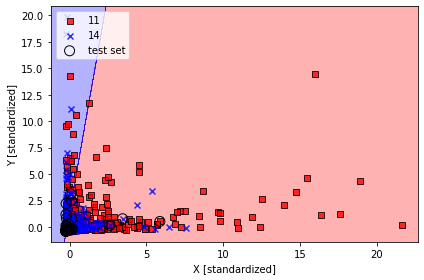

In [136]:
# execution of function for plotting
result = classification_run(top_combination1)

X = result[0]
ppn = result[1]
X_train_std = result[3]
X_test_std = result[4]
y_train = result[5]
y_test = result[6]



X_combined_std = np.vstack((X_train_std, X_test_std))
y_combined = np.hstack((y_train, y_test))

# plot
plot_decision_regions(X=X_combined_std, y=y_combined,
                    classifier=ppn, test_idx=range(105, 150))
plt.xlabel('X [standardized]')
plt.ylabel('Y [standardized]')
plt.legend(loc='upper left')

plt.tight_layout()
plt.show()

<ipython-input-134-7039fff38d0c>:22: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(x=X[y == cl, 0],


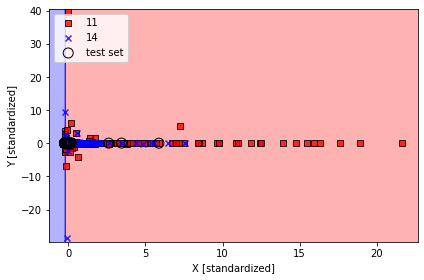

In [138]:
# same as above for the decision tree

top_combination2 = []
top_combination2.append(results_tree.iloc[0,0])

result = classification_run(top_combination2)

X = result[0]

tree_clf = result[2]
X_train_std = result[3]
X_test_std = result[4]
y_train = result[5]
y_test = result[6]

X_combined = np.vstack((X_train_std, X_test_std))
y_combined = np.hstack((y_train, y_test))
plot_decision_regions(X_combined, y_combined, 
                      classifier=tree_clf, test_idx=range(105, 150))

plt.xlabel('X [standardized]')
plt.ylabel('Y [standardized]')
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()

__2. Sentiment Analysis__

Attached you will find a file `text_data.csv` that contains a list of sentences related to finance. For each sentence, i.e., for each row in the table, the data contains an indicator for sentiment: negative, positive, or neutral.

Please use the data to create a bag-of-words model using only unigrams. Split the data into training and test data and use a DecisionTreeClassifier to predict the sentiment.

As in the previous questions, train the model for various choices of hyperparameters and report the results for training and test data for each choice.

Repeat the task except that you now use both unigrams and bigrams.

In [140]:
import csv
import st
import os
import re
import pandas as pd
import numpy as np

from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer, TfidfVectorizer
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.datasets import make_classification
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor, plot_tree
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.pipeline import Pipeline

In [141]:
# Reading the data and transform it with the preprocessor we applied in the lectures
df = pd.read_csv('text_data.csv', header=None, encoding = 'ISO-8859-1')
df = df.rename(columns = {0:"Sentiment", 1 : "Text"})
df["Sentiment"].replace({"negative": "0", "neutral" : "1", "positive" : "2"},
                        inplace=True)
#np.random.seed(0)
#df = df.reindex(np.random.permutation(df.index)).reset_index(drop=True)

def preprocessor(text):
    text = re.sub('<[^>]*>', '', text)
    emoticons = re.findall('(?::|;|=)(?:-)?(?:\)|\(|D|P)',
                           text)
    text = (re.sub('[\W]+', ' ', text.lower()) +
            ' '.join(emoticons).replace('-', ''))
    return text

df['Text'] = df['Text'].apply(preprocessor)

In [142]:
count = CountVectorizer()
X = count.fit_transform(df['Text'])
y = df['Sentiment']
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=1, stratify= y)

In [143]:
#create a tree like in example 1
test_accuracy = []
train_accuracy = []
combination_s = []
Misclassified_samples = []
Misclassified_train_samples = []

tree_test_accuracy = []
tree_train_accuracy = []
Misclassified_samples_tree = []
Misclassified_train_samples_tree = []

for d in list(range(1,50)):
        tree_clf = DecisionTreeClassifier(max_depth= d) 
        tree_clf.fit(X_train, y_train)

        y_pred_test_tree = tree_clf.predict(X_test)
        y_pred_train_tree = tree_clf.predict(X_train)

        tree_test_accuracy.append(round(tree_clf.score(X_test, y_test),3))
        tree_train_accuracy.append(round(tree_clf.score(X_train, y_train),3))
        Misclassified_samples_tree.append((y_test != y_pred_test_tree).sum())
        Misclassified_train_samples_tree.append((y_train != y_pred_train_tree).sum())


results_tree = pd.DataFrame(list(zip(tree_test_accuracy, tree_train_accuracy, Misclassified_samples_tree, Misclassified_train_samples_tree)), columns=['test_accuracy_tree', 'train_accuracy_tree', 'Misclassified_samples_tree', 'Misclassified_train_samples_tree'])
  

results_tree.sort_values(by=['test_accuracy_tree'],ascending=False,inplace=True)

print(results_tree.head())

    test_accuracy_tree  train_accuracy_tree  Misclassified_samples_tree  \
30               0.713                0.894                         418   
33               0.711                0.904                         420   
23               0.710                0.865                         422   
45               0.709                0.937                         423   
37               0.709                0.918                         423   

    Misclassified_train_samples_tree  
30                               360  
33                               327  
23                               459  
45                               215  
37                               277  


In [144]:
accuracy_score(y_test, y_pred_test_tree)

0.7008253094910591

In [145]:
param_grid = {
            "criterion": ["gini", "entropy"],
            "max_depth" : list(range(1,50)),
            "splitter" : ["best", "random"]
}

grid = GridSearchCV(tree_clf, 
                    param_grid, 
                    cv = 5, 
                    n_jobs = -1) 

In [146]:
grid.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(max_depth=49), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                                       13, 14, 15, 16, 17, 18, 19, 20, 21, 22,
                                       23, 24, 25, 26, 27, 28, 29, 30, ...],
                         'splitter': ['best', 'random']})

In [147]:
grid.best_estimator_

DecisionTreeClassifier(max_depth=27, splitter='random')

In [148]:
grid.best_score_ #With only varying the max_depth we got 70%. When varying other hyperparamethers we may get to 72%. 

0.7213979433576186

In [149]:
grid.best_params_ # 21 is close to our 19

{'criterion': 'gini', 'max_depth': 27, 'splitter': 'random'}

In [150]:
vect_bigram = CountVectorizer(ngram_range=(2, 2))
Z = pd.DataFrame(vect_bigram.fit_transform(df['Text']))
tfidf = TfidfTransformer(use_idf=True, 
                        norm='l2', 
                        smooth_idf=True)

A = pd.DataFrame(tfidf.fit_transform(count.fit_transform(df['Text'])))

bag_bigrams = vect_bigram.fit_transform(df['Text'])
bag_uni = tfidf.fit_transform(count.fit_transform(df['Text']))

In [151]:
final = np.concatenate((bag_bigrams.toarray(),bag_uni.toarray()), axis=1)
final.shape

(4846, 58719)

In [152]:
X_train_b, X_test_b, y_train_b, y_test_b = train_test_split(
    final, y, test_size=0.3, random_state=1, stratify= y)

In [153]:
#create a tree for bigrams and unigrams
test_accuracy = []
train_accuracy = []
combination_s = []
Misclassified_samples = []
Misclassified_train_samples = []

tree_test_accuracy = []
tree_train_accuracy = []
Misclassified_samples_tree = []
Misclassified_train_samples_tree = []

for d in list(range(1,6)):
        tree_clf = DecisionTreeClassifier(max_depth= d, random_state=1) 
        tree_clf.fit(X_train_b, y_train_b)

        y_pred_test_tree_b = tree_clf.predict(X_test_b)
        y_pred_train_tree_b = tree_clf.predict(X_train_b)

        tree_test_accuracy.append(round(tree_clf.score(X_test_b, y_test_b),3))
        tree_train_accuracy.append(round(tree_clf.score(X_train_b, y_train_b),3))
        Misclassified_samples_tree.append((y_test_b != y_pred_test_tree_b).sum())
        Misclassified_train_samples_tree.append((y_train_b != y_pred_train_tree_b).sum())

results_perceptron = pd.DataFrame(list(zip(test_accuracy, train_accuracy,Misclassified_samples,Misclassified_train_samples)), columns =['test_accuracy', 'train_accuracy', 'Misclassified_samples','Misclassified_train_samples'])
results_tree = pd.DataFrame(list(zip(tree_test_accuracy, tree_train_accuracy, Misclassified_samples_tree, Misclassified_train_samples_tree)), columns=['test_accuracy_tree', 'train_accuracy_tree', 'Misclassified_samples_tree', 'Misclassified_train_samples_tree'])
  
results_perceptron.sort_values(by=['test_accuracy'],ascending=False,inplace=True)
results_tree.sort_values(by=['test_accuracy_tree'],ascending=False,inplace=True)

print(results_tree.head())

   test_accuracy_tree  train_accuracy_tree  Misclassified_samples_tree  \
4               0.674                0.699                         474   
3               0.664                0.679                         488   
2               0.656                0.666                         500   
1               0.645                0.646                         516   
0               0.622                0.626                         549   

   Misclassified_train_samples_tree  
4                              1022  
3                              1090  
2                              1133  
1                              1200  
0                              1270  


In [154]:
accuracy_score(y_test_b, y_pred_test_tree_b)

0.6740027510316369

In [155]:
param_grid = {
            "criterion": ["gini", "entropy"],
            "max_depth" : list(range(1,6)),
            "splitter" : ["best", "random"]
}

grid = GridSearchCV(tree_clf, 
                    param_grid, 
                    cv = 5, 
                    n_jobs = -1) 

In [156]:
grid.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=DecisionTreeClassifier(max_depth=5, random_state=1),
             n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [1, 2, 3, 4, 5],
                         'splitter': ['best', 'random']})

In [157]:
grid.best_estimator_

DecisionTreeClassifier(criterion='entropy', max_depth=5, random_state=1,
                       splitter='random')

In [158]:
grid.best_score_ #With only varying the max_depth we got 67%. When varying other hyperparamethers we may get to 67%. 

## I think the problem is that the range of possible values should be much higher. This is time consuming however - we do not had the time for it. 

0.6768851469061303

In [159]:
grid.best_params_ # 5 is close to our 4

{'criterion': 'entropy', 'max_depth': 5, 'splitter': 'random'}

# Python was throwing errors, when trying to loop over various hyperparameters. Given the time, we just included a minor selection

<img src="Capture.JPG">